In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import waterfall_chart
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error
from collections import defaultdict
import ruptures as rpt

pd.options.mode.chained_assignment = None

## Analiza danych

In [2]:
#df = pd.read_csv("https://www.openml.org/data/get_csv/52615/wind.arff")
df = pd.read_csv("wind.csv")

Dane pochodzą z https://www.openml.org/d/503.
Zmienną celu jest zmienna MAL (average wind speed in knots at station MAL)

Opis zmiennych  
year - year, minus 1900  
month - month (number) of the year  
day - day  

RPT - average wind speed in knots at station RPT  
VAL - average wind speed in knots at station VAL  
ROS - average wind speed in knots at station ROS  
KIL - average wind speed in knots at station KIL  
SHA - average wind speed in knots at station SHA  
BIR - average wind speed in knots at station BIR  
DUB - average wind speed in knots at station DUB  
CLA - average wind speed in knots at station CLA  
MUL - average wind speed in knots at station MUL  
CLO - average wind speed in knots at station CLO  
BEL - average wind speed in knots at station BEL  
MAL - average wind speed in knots at station MAL  

In [3]:
df.head()

,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,13.96,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,16.88,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,8.04,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [4]:
assert np.all(df.isna().sum().values == 0)

In [5]:
df.describe()

,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.000000,6574.00000,6574.000000,6574.000000,6574.000000,6574.000000
mean,69.500304,6.523274,15.728628,12.363715,10.646448,11.660103,6.306275,10.456880,7.092254,9.796834,8.49442,8.495818,8.707268,13.121007,15.599462
std,5.188131,3.448871,8.800335,5.619610,5.268602,5.007765,3.605407,4.935739,3.968683,4.977272,4.49900,4.167778,4.503615,5.835037,6.697857
min,61.000000,1.000000,1.000000,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.00000,0.000000,0.040000,0.130000,0.670000
25%,65.000000,4.000000,8.000000,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.09000,5.370000,5.330000,8.710000,10.710000
50%,69.500000,7.000000,16.000000,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.08000,8.170000,8.290000,12.500000,15.000000
75%,74.000000,10.000000,23.000000,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.42000,11.210000,11.630000,16.880000,19.830000
max,78.000000,12.000000,31.000000,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.08000,25.880000,28.210000,42.380000,42.540000


In [6]:
X = df[df.columns[:-1]]
y = df[df.columns[-1]]

In [7]:
# Podział na zbiór testowy i treningowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=23)

### Trening na danych oryginalnych

In [10]:
gbm = xgb.XGBClassifier(learning_rate=0.1, n_estimators=20, max_depth=5, objective='reg:squarederror', seed=27)
rf = RandomForestRegressor(n_estimators=100)
svc = SVR(gamma="scale")
lr_model = LinearRegression().fit(X_train, y_train)
models = dict(zip(["SupportVectorMachine", "RandomForest", "XGBoost", "Linear"], [svc, rf, gbm, lr_model]))

In [11]:
for key in models.keys():
    print(f"Model {key}")
    models[key] = models[key].fit(X_train, y_train)

Model SupportVectorMachine
Model RandomForest
Model XGBoost
Model Linear


In [12]:
errors = []
for key in models.keys():
    y_pred = models[key].predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors.append(error)

In [13]:
results = pd.DataFrame(zip(list(models.keys()), errors), columns=["model", "[MSE] Raw set"])

In [14]:
results

,model,[MSE] Raw set
0,SupportVectorMachine,11.226268
1,RandomForest,9.832475
2,XGBoost,17.444387
3,Linear,10.704784


#### Przekształcenie zmiennych na nowe zmienne kategoryczne za pomocą ALE plot.

Najdokładniejszym modelem okazał się Random Forest i ten model posłuży do transformacji zbioru

In [15]:
def ale_plot_with_breaks(model, X, y, variable):
    diffs = [0]
    grid = np.linspace(X[variable].min(), X[variable].max(), 100)
    
    for i in range(1, len(grid)):
        X.loc[:, variable] = X[variable].astype('float')
        points = X[(X[variable] >= grid[i - 1]) & (X[variable] <= grid[i])].copy()
        if len(points)==0:
            diffs.append(0)
            continue
        forward_points = points.copy()
        forward_points.loc[:, variable] = grid[i]
        backward_points = points.copy()
        backward_points.loc[:, variable] = grid[i - 1]
        difference = np.mean(model.predict(forward_points) - model.predict(backward_points))
        diffs.append(difference)
    ale_values = np.cumsum(diffs)
    plt.title(f"ALE plot with breaks for {column} variable")
    plt.plot(grid, ale_values, label=column)
    algo = rpt.Pelt(model="rbf").fit(ale_values)
    result = algo.predict(pen=0.5)
    breaks = []
    for i in range(len(result)-1):
        x = (grid[result[i]-1] + grid[result[i]])/2
        plt.axvline(x, color="grey", linestyle = "--")
        breaks.append(x)
    plt.show()
    
    return breaks

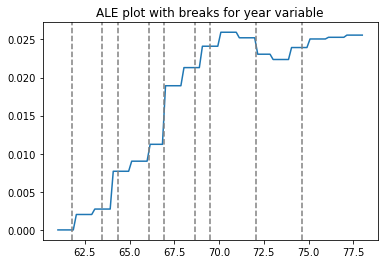

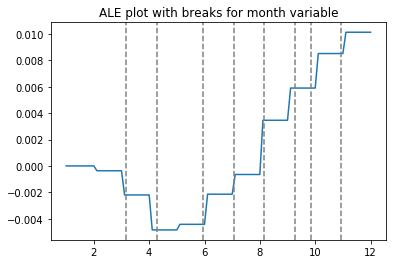

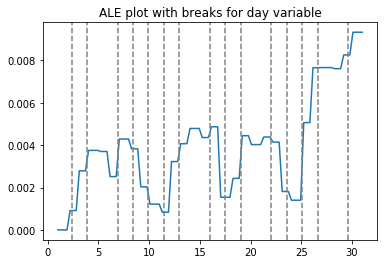

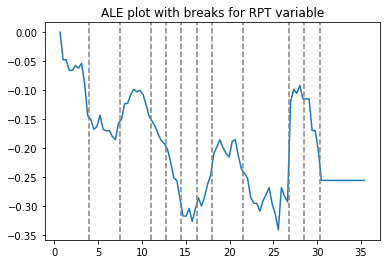

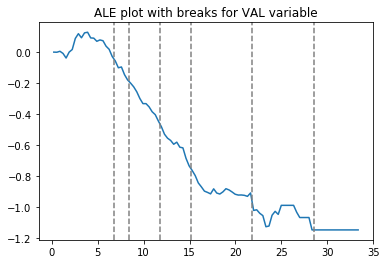

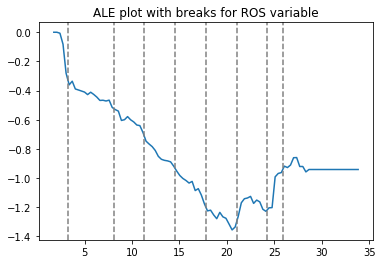

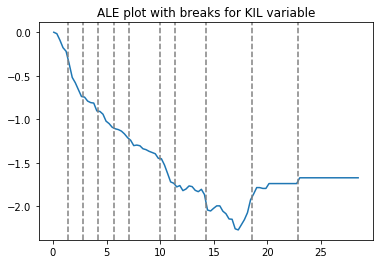

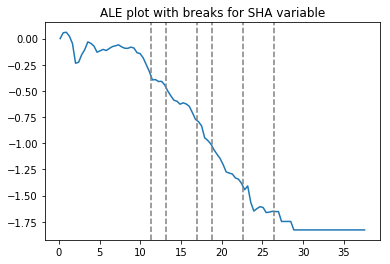

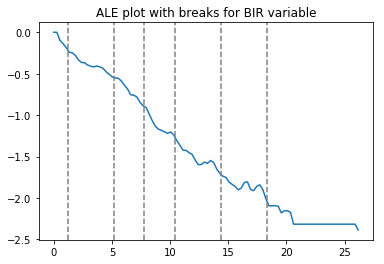

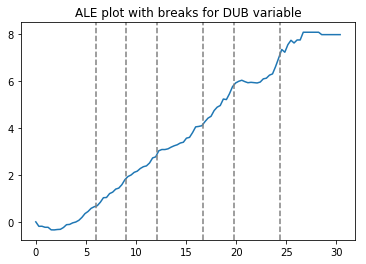

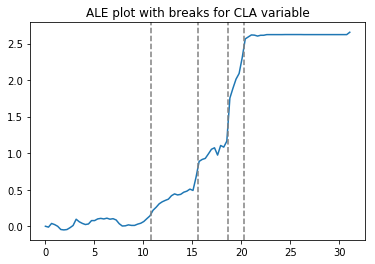

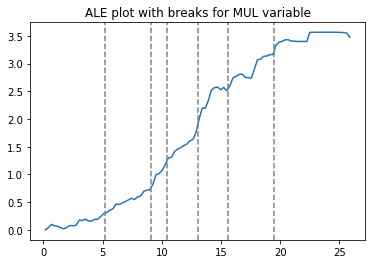

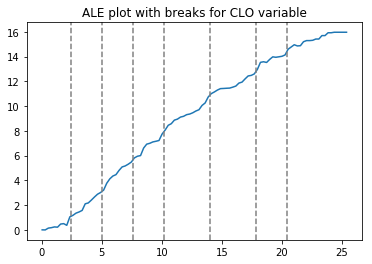

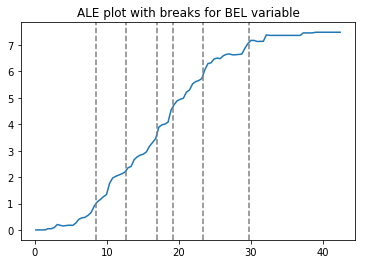

In [16]:
model = models["RandomForest"]
breaks = {}
for i, column in enumerate(X_test.columns):
    breaks[column] = ale_plot_with_breaks(model, X_train, y_train, column)

In [17]:
def get_first_greater_idx(x, breakpoints):    
    return next((i for i, v in enumerate(breakpoints) if v > x), len(breakpoints))

In [18]:
def transform(X, breaks):
    X_extended = pd.DataFrame()
    for column, breakpoints in breaks.items():
        X_extended[column] = X[column].apply(get_first_greater_idx, breakpoints=breakpoints)
    return X_extended

In [19]:
X_train_extended = transform(X_train, breaks)
X_test_extended = transform(X_test, breaks)

In [20]:
X_test_extended.head()

,year,month,day,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL
1954,3,2,4,5,2,3,5,0,3,3,0,3,4,1
4222,7,3,12,1,0,1,1,0,1,0,0,0,1,1
2000,3,3,12,5,2,3,5,2,4,3,0,3,4,2
3771,7,1,15,1,0,1,1,0,1,0,0,0,1,0
2005,3,3,14,2,0,1,1,0,1,0,0,0,1,1


### Trening na danych wzbogaconych

In [21]:
for key in models.keys():
    print(f"Model {key}")
    models[key] = models[key].fit(X_train_extended, y_train)

Model SupportVectorMachine
Model RandomForest
Model XGBoost
Model Linear


In [22]:
errors_extended = []
for key in models.keys():
    y_pred = models[key].predict(X_test_extended)
    error = mean_squared_error(y_test, y_pred)
    errors_extended.append(error)

In [23]:
results["[MSE] Extended set"] = errors_extended

## Podsumowanie i wnioski

In [24]:
results

,model,[MSE] Raw set,[MSE] Extended set
0,SupportVectorMachine,11.226268,10.856771
1,RandomForest,9.832475,10.868048
2,XGBoost,17.444387,18.307328
3,Linear,10.704784,11.228280


Zaletą stosowania takich metod jest późniejsza łatwość w interpretacji modelu. Dodatkowo jeśli ilość parametów jest bardzo wysoka, takie działanie może zredukować szum w danych, co nierzadko powoduje poprawę predykcji albo chociaż utrzymanie jakości przy mniejszej ilości zmiennych.

Taka transformacja zmiennych dzieje się jednak kosztem utraty pewnej ilości informacji.

Podejrzewam, że operacja taka nie sprawdza się w przypadkach, kiedy model liniowy stosowany do wyjściowych danych daje dobre wyniki w porównaniu do innych predyktorów. Taka sytuacja oznacza, że problem jest z natury "liniowy" a każda próba redukcji zmiennych ciągłych będzie prowadziła do ogólnego pogorszenia przewidywań wszystkich modeli. Taka sytuacja zaszła w przedstawionej powyżej analizie.